In [4]:
import pandas as pd
import numpy as np

#Glossary
df = pd.read_excel('C:\\Users\\santi\\OneDrive\\Desktop\\SAPS_2016_Glossary.xlsx')
df.head()

,Themes,Tables Within Themes,Column Names,Description of Field,Equivalent SAPS2011 Variable (if name changed),Points to Note
0,"Theme 1: Sex, Age and Marital Status",Table 1,T1_1AGE0M,Age 0 - Males,NaN,NaN
1,NaN,"Population aged 0 - 19 by sex and year of age,...",T1_1AGE1M,Age 1 - Males,NaN,NaN
2,NaN,NaN,T1_1AGE2M,Age 2 - Males,NaN,NaN
3,NaN,NaN,T1_1AGE3M,Age 3 - Males,NaN,NaN
4,NaN,NaN,T1_1AGE4M,Age 4 - Males,NaN,NaN


In [5]:
df['Themes'] = df['Themes'].ffill()
df.head()

,Themes,Tables Within Themes,Column Names,Description of Field,Equivalent SAPS2011 Variable (if name changed),Points to Note
0,"Theme 1: Sex, Age and Marital Status",Table 1,T1_1AGE0M,Age 0 - Males,NaN,NaN
1,"Theme 1: Sex, Age and Marital Status","Population aged 0 - 19 by sex and year of age,...",T1_1AGE1M,Age 1 - Males,NaN,NaN
2,"Theme 1: Sex, Age and Marital Status",NaN,T1_1AGE2M,Age 2 - Males,NaN,NaN
3,"Theme 1: Sex, Age and Marital Status",NaN,T1_1AGE3M,Age 3 - Males,NaN,NaN
4,"Theme 1: Sex, Age and Marital Status",NaN,T1_1AGE4M,Age 4 - Males,NaN,NaN


In [6]:
df['Themes'].unique()

array(['Theme 1: Sex, Age and Marital Status ',
       'Theme 2: Migration, Ethnicity, Religion and Foreign Languages',
       'Theme 3: Irish Language ', 'Theme 4: Families ',
       'Theme 5: Private Households ', 'Theme 6: Housing ',
       'Theme 7: Communal Establishments ', 'Theme 8: Principal Status ',
       'Theme 9: Social Class and Socio-Economic Group ',
       'Theme 10: Education ', 'Theme 11: Commuting ',
       'Theme 12: Disability, Carers and General Health ',
       'Theme 13: Occupations', 'Theme 14: Industries ',
       'Theme 15: Motor Car Availability, PC Ownership and Internet Access'],
      dtype=object)

In [7]:
Glossary = df[(df['Themes']=='Theme 5: Private Households ')|  (df['Themes']== 'Theme 6: Housing ')]
Glossary.shape

(148, 6)

#### Importing actual dataset

In [8]:
Census = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\SAPS2016_DC2013.csv',encoding='iso-8859-1')
Census.shape

(40, 802)

In [9]:
Glossary.columns

Index(['Themes', 'Tables Within Themes', 'Column Names',
       'Description of Field',
       'Equivalent SAPS2011 Variable (if name changed)', 'Points to Note'],
      dtype='object')

In [10]:
Glossary['Column Names']

306     T5_1OP_H
307     T5_1MC_H
308     T5_1CC_H
309    T5_1MCC_H
310    T5_1CCC_H
         ...    
449       T6_8_O
450      T6_8_TA
451     T6_8_UHH
452     T6_8_OVD
453       T6_8_T
Name: Column Names, Length: 148, dtype: object

In [11]:
Census.columns

Index(['GUID', 'GEOGID', 'GEOGDESC', 'T1_1AGE0M', 'T1_1AGE1M', 'T1_1AGE2M',
       'T1_1AGE3M', 'T1_1AGE4M', 'T1_1AGE5M', 'T1_1AGE6M',
       ...
       'T15_1_TC', 'T15_2_Y', 'T15_2_N', 'T15_2_NS', 'T15_2_T', 'T15_3_B',
       'T15_3_OTH', 'T15_3_N', 'T15_3_NS', 'T15_3_T'],
      dtype='object', length=802)

In [12]:
ID = Census[['GUID', 'GEOGID', 'GEOGDESC']]
Census = Census.drop(['GUID', 'GEOGID', 'GEOGDESC'], axis=1)

In [13]:
Census_test = Census.filter(items=Glossary['Column Names'])

In [14]:
Census = pd.concat([Census_test,ID], axis=1)
Census.head()

,T5_1OP_H,T5_1MC_H,T5_1CC_H,T5_1MCC_H,T5_1CCC_H,T5_1OPFC_H,T5_1OPMC_H,T5_1CO_H,T5_1CCO_H,T5_1OPFCO_H,...,T6_7_NS,T6_7_T,T6_8_O,T6_8_TA,T6_8_UHH,T6_8_OVD,T6_8_T,GUID,GEOGID,GEOGDESC
0,"12,102","8,456","1,928","17,908","2,475",836,"4,825",527,"1,005",108,...,"1,878","53,633","53,850","1,329",812,"4,664","60,655",AA601F40-12B7-41E8-A384-74688CC75084,DC2013_01,Carlow-Kilkenny
1,"10,567","6,741","1,265","15,218","1,829",720,"3,785",388,808,86,...,"1,745","43,668","43,816","1,138",761,"6,424","52,139",AC869BFE-5EB7-4479-AF27-670D394B2656,DC2013_02,Cavan-Monaghan
2,"10,760","6,876","1,418","13,261","1,631",658,"3,452",334,579,87,...,"1,564","41,320","41,618","1,172","4,817","6,006","53,613",3D7FB62A-AF60-4D22-A873-542ACE8EA01D,DC2013_03,Clare
3,"9,978","6,497","1,668","15,001","2,048",665,"3,952",429,741,73,...,"1,691","43,172","43,376","1,237","1,121","4,350","50,084",48BFAC96-2DFF-4372-B216-A46EA183E87E,DC2013_04,Cork East
4,"11,224","6,116","1,934","12,542","1,563",620,"4,170",509,745,65,...,"2,535","44,992","45,415","1,226",67,"3,424","50,132",CD9AB3FF-8A12-4F77-96D4-5F4EF76E07CC,DC2013_05,Cork North-Central


Comparing average household size between Ireland and scotland

In [15]:
Ireland_avg_house = Census[['T5_2_1PH',
'T5_2_2PH',
'T5_2_3PH',
'T5_2_4PH',
'T5_2_5PH',
'T5_2_6PH',
'T5_2_7PH',
'T5_2_GE8PH',
'T5_2_TH' ]]
Ireland_avg_house.head()


,T5_2_1PH,T5_2_2PH,T5_2_3PH,T5_2_4PH,T5_2_5PH,T5_2_6PH,T5_2_7PH,T5_2_GE8PH,T5_2_TH
0,"12,102","15,312","9,541","9,379","5,099","1,750",429,200,"53,812"
1,"10,567","11,730","7,189","7,203","4,599","1,793",471,262,"43,814"
2,"10,760","11,836","6,736","6,613","3,763","1,293",308,131,"41,440"
3,"9,978","11,776","7,672","7,886","4,261","1,308",286,108,"43,275"
4,"11,224","13,171","7,886","7,344","3,730","1,269",302,146,"45,072"


In [16]:

for x in Ireland_avg_house.columns:
    try:
        Ireland_avg_house[x] = Ireland_avg_house[x].str.replace(',','')
        Ireland_avg_house[x] = pd.to_numeric(Ireland_avg_house[x])
    except:
        print('column not str')
        
Ireland_avg_house['Average household size'] = (Ireland_avg_house['T5_2_1PH']*1 + 
                                               Ireland_avg_house['T5_2_2PH']*2 + 
                                               Ireland_avg_house['T5_2_3PH']*3 + 
                                               Ireland_avg_house['T5_2_4PH']*4 + 
                                               Ireland_avg_house['T5_2_5PH']*5 + 
                                               Ireland_avg_house['T5_2_6PH']*6 + 
                                               Ireland_avg_house['T5_2_7PH']*7 +
                                               Ireland_avg_house['T5_2_GE8PH']*8) / Ireland_avg_house['T5_2_TH'] 
Ireland_avg_house.head()


column not str
column not str


C:\Users\santi\AppData\Local\Temp\ipykernel_31992\1303354070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ireland_avg_house[x] = Ireland_avg_house[x].str.replace(',','')
C:\Users\santi\AppData\Local\Temp\ipykernel_31992\1303354070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ireland_avg_house[x] = pd.to_numeric(Ireland_avg_house[x])
C:\Users\santi\AppData\Local\Temp\ipykernel_31992\1303354070.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,T5_2_1PH,T5_2_2PH,T5_2_3PH,T5_2_4PH,T5_2_5PH,T5_2_6PH,T5_2_7PH,T5_2_GE8PH,T5_2_TH,Average household size
0,12102,15312,9541,9379,5099,1750,429,200,53812,2.777503
1,10567,11730,7189,7203,4599,1793,471,262,43814,2.819921
2,10760,11836,6736,6613,3763,1293,308,131,41440,2.675410
3,9978,11776,7672,7886,4261,1308,286,108,43275,2.775482
4,11224,13171,7886,7344,3730,1269,302,146,45072,2.665646


In [17]:
Ireland_avg_house.shape

(40, 10)

Scotland Census

https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/households/household-estimates/2021

In [18]:
scotland = pd.read_excel('C:\\Users\\santi\\OneDrive\\Desktop\\house-est-21-data.xlsx', sheet_name='Table3')
scotland.head()

,"Table 3: Average household size for Scotland by council area, June 2001 to 2021 [note 5] [note 6]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,This worksheet contains one table. Some cells ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mid-year population estimates for 2021 were no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Back to contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Council,2001.00,2002.00,2003.00,2004.00,2005.00,2006.0,2007.00,2008.00,2009.00,...,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,Change 2020 - 2021 \n %,Change 2011 - 2021 \n %,Change 2001 - 2021 \n %
4,Scotland,2.27,2.25,2.23,2.22,2.21,2.2,2.19,2.18,2.18,...,2.17,2.17,2.16,2.15,2.15,2.14,2.12,-0.934579,-3.196347,-6.60793


In [19]:
scotland = scotland.iloc[3:]
scotland = scotland.rename(columns=scotland.iloc[0])
scotland = scotland.iloc[2:]
scotland.head()

,Council,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Change 2020 - 2021 \n %,Change 2011 - 2021 \n %,Change 2001 - 2021 \n %
5,Aberdeen City [note 4],2.13,2.10,2.08,2.05,2.04,2.02,2.01,2.01,2.03,...,2.10,2.07,2.06,2.03,2.03,2.02,2.02,0,-2.415459,-5.164319
6,Aberdeenshire,2.47,2.45,2.44,2.42,2.41,2.41,2.41,2.40,2.40,...,2.37,2.35,2.34,2.33,2.31,2.29,2.27,-0.873362,-5.020921,-8.097166
7,Angus,2.27,2.26,2.24,2.24,2.24,2.23,2.23,2.23,2.21,...,2.17,2.16,2.14,2.12,2.11,2.10,2.08,-0.952381,-6.306306,-8.370044
8,Argyll and Bute,2.24,2.23,2.20,2.19,2.16,2.17,2.17,2.15,2.15,...,2.06,2.06,2.04,2.01,2.00,1.98,1.96,-1.010101,-8.411215,-12.5
9,City of Edinburgh [note 4],2.14,2.11,2.09,2.07,2.06,2.05,2.04,2.03,2.04,...,2.11,2.13,2.13,2.13,2.14,2.14,2.12,-0.934579,2.415459,-0.934579


In [20]:
scotland[2016.00].describe()

count    32.000000
mean      2.180625
std       0.102136
min       2.050000
25%       2.105000
50%       2.155000
75%       2.240000
max       2.420000
Name: 2016.0, dtype: float64

In [21]:
Ireland_avg_house['Average household size'].describe()

count    40.000000
mean      2.754412
std       0.185192
min       2.236814
25%       2.674458
50%       2.730714
75%       2.840331
max       3.100291
Name: Average household size, dtype: float64

[Text(0.5, 0, 'Ireland'), Text(0, 0.5, 'Average Household size')]

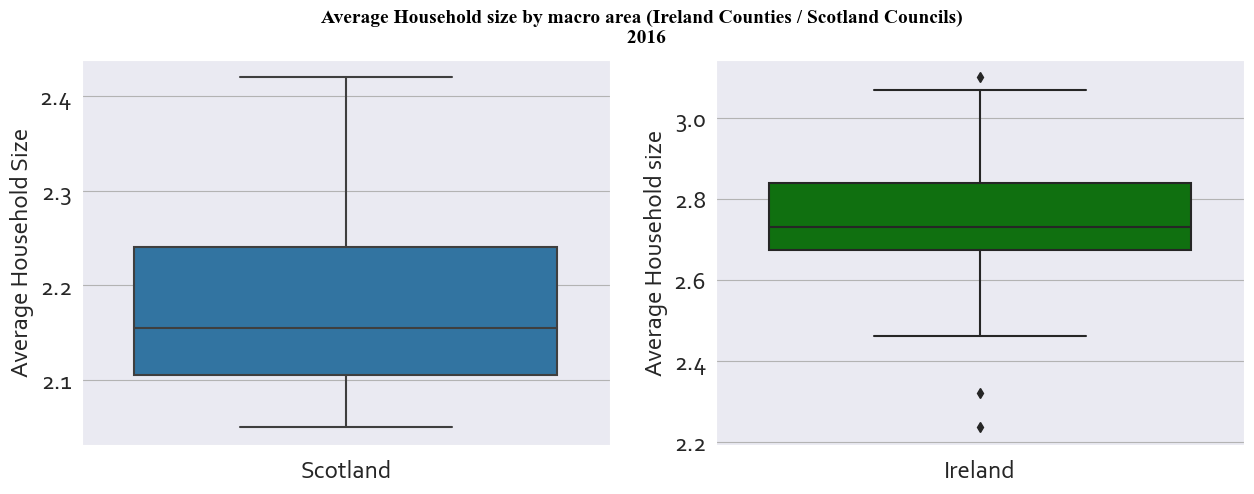

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
rc = {'figure.figsize':(10,5),
      'axes.grid' : True,
      'grid.color': '.7',
      'font.family':'Corbel',
      'font.size' : 18}
plt.rcParams.update(rc)


fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Average Household size by macro area (Ireland Counties / Scotland Councils) \n 2016',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)
sns.boxplot(y= 2016.00,data=scotland,ax=ax[0]).set(
    xlabel='Scotland', 
    ylabel='Average Household Size')
sns.boxplot(y= 'Average household size',data=Ireland_avg_house,ax=ax[1], color='green').set(
    xlabel='Ireland', 
    ylabel='Average Household size')

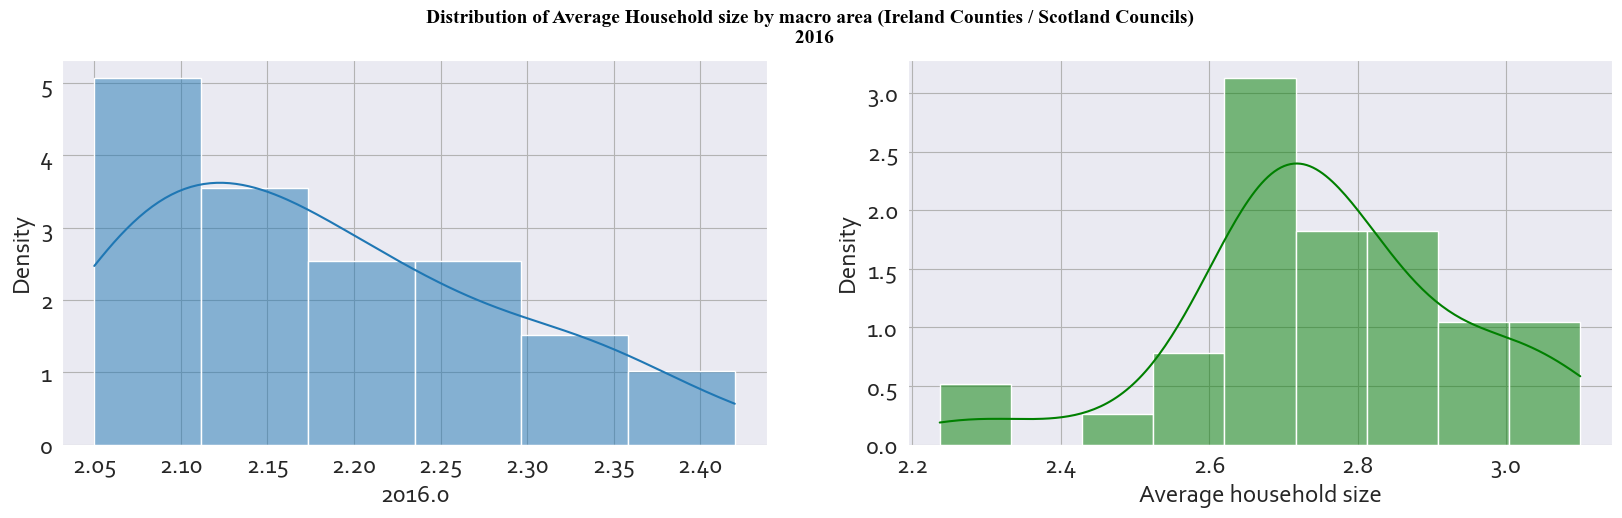

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Distribution of Average Household size by macro area (Ireland Counties / Scotland Councils) \n 2016',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)

sns.histplot(x= scotland[2016.00], kde=True, stat='density', ax=axes[0])
sns.histplot(x= Ireland_avg_house['Average household size'], kde=True, stat='density', ax=axes[1],color='green')


plt.show()

#### Checking for normality a= 0.05

Text(0.5, 1.0, 'Ireland')

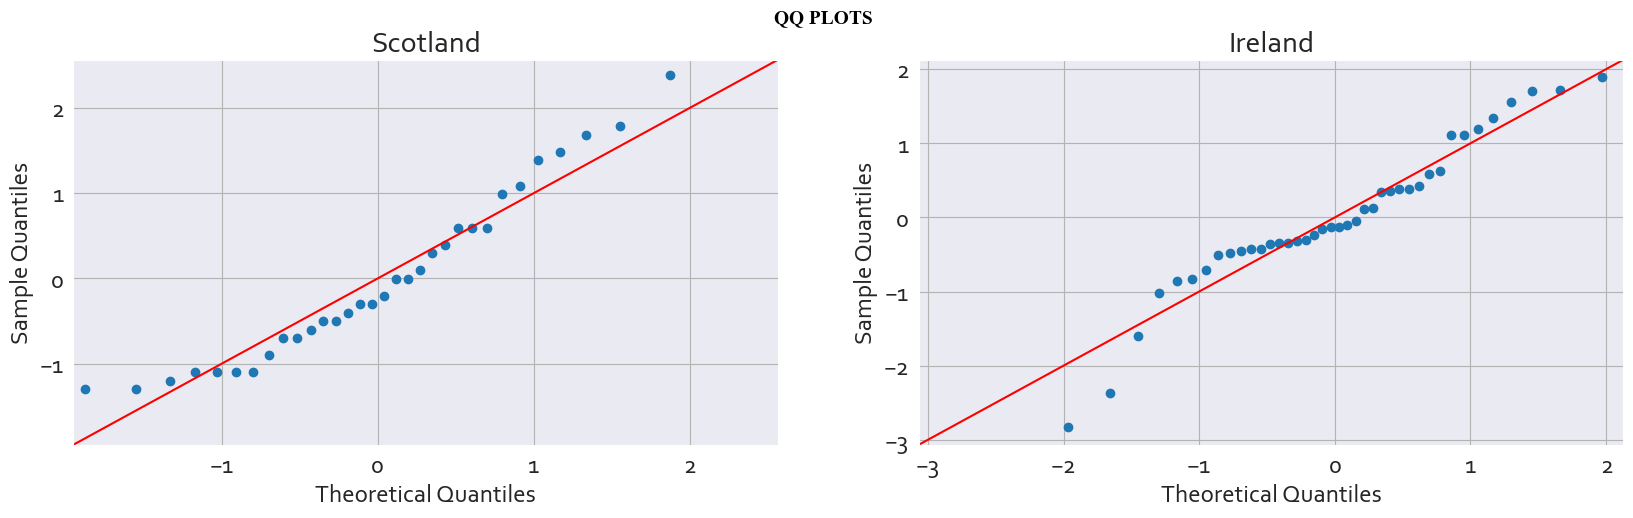

In [24]:
import statsmodels.api as sm

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('QQ PLOTS',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)

fig = sm.qqplot(scotland[2016.00], line='45' ,fit = True, ax=ax[0])
ax[0].set_title('Scotland')
fig = sm.qqplot(Ireland_avg_house['Average household size'],fit = True, line='45' , ax=ax[1])
ax[1].set_title('Ireland')

In [25]:
from scipy.stats import shapiro
stat, p = shapiro(Ireland_avg_house['Average household size'])
print('Ireland p value: ' + str(p))
print('Ireland stat value: ' + str(stat))

stat, p = shapiro(scotland[2016.00])
print('Ireland p value: ' + str(p))
print('Ireland stat value: ' + str(stat))

Ireland p value: 0.07477682083845139
Ireland stat value: 0.9498233795166016
Ireland p value: 0.054151393473148346
Ireland stat value: 0.9350242018699646


both p values are greater than 0.05, data is considered normal

#### Levene test

In [26]:
from scipy.stats import levene
stat, p = levene(Ireland_avg_house['Average household size'], scotland[2016.00])
print( f'Levene test p: {p}')

Levene test p: 0.03858459942228186


there is a Significant difference between the variances so we're going for non parametric test

H0: median of averages scotland = median of averages Ireland

H1: median of averages people per household is different between ireland and scotland

In [27]:
from scipy import stats
stats.mannwhitneyu(Ireland_avg_house['Average household size'],scotland[2016.00])

MannwhitneyuResult(statistic=1266.0, pvalue=1.3456151330532647e-12)

We reject H0: there's a significanctly difference between the average people in household per macro region between Ireland and Scotland

## Tims Serie analysis

In [28]:
Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv',encoding= 'unicode_escape' )
Data.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_31992\4218614081.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv',encoding= 'unicode_escape' )


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


dataset is here:  https://www.propertypriceregister.ie/

In [29]:
Data.isna().sum()

Date of Sale (dd/mm/yyyy)         0
Address                           0
County                            0
Eircode                      504949
Price ()                         0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    543712
dtype: int64

In [30]:
Data = Data.drop_duplicates()
Data.shape

(595678, 9)

In [31]:
Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv', encoding='unicode_escape')
Data_1 = Data.groupby(['Date of Sale (dd/mm/yyyy)', 'County'])['Address'].agg('count').reset_index()
Data_1['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(Data_1['Date of Sale (dd/mm/yyyy)'])
Data_1 = Data_1.sort_values(by='Date of Sale (dd/mm/yyyy)')
Data_1 = Data_1.pivot_table(index='Date of Sale (dd/mm/yyyy)', columns='County', values='Address')
Data_1 = Data_1.fillna(0)
Data_1['total'] = Data_1.sum(axis=1)
Data_Horizontal = Data_1
Data_Horizontal.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_31992\4291516210.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv', encoding='unicode_escape')
C:\Users\santi\AppData\Local\Temp\ipykernel_31992\4291516210.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Data_1['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(Data_1['Date of Sale (dd/mm/yyyy)'])


County,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,Kilkenny,...,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow,total
Date of Sale (dd/mm/yyyy),,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2010-01-02,0.0,0.0,1.0,7.0,2.0,21.0,3.0,1.0,3.0,3.0,...,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,57.0
2010-01-03,0.0,0.0,0.0,11.0,2.0,24.0,3.0,2.0,2.0,2.0,...,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,3.0,70.0
2010-01-04,1.0,1.0,1.0,13.0,4.0,47.0,9.0,3.0,6.0,2.0,...,1.0,1.0,0.0,3.0,3.0,3.0,5.0,3.0,3.0,123.0
2010-01-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [32]:
Data_vertical =  Data_Horizontal.melt(var_name='county', value_name='# property', ignore_index = False)
Data_vertical.head()

,county,# property
Date of Sale (dd/mm/yyyy),,
2010-01-01,Carlow,0.0
2010-01-02,Carlow,0.0
2010-01-03,Carlow,0.0
2010-01-04,Carlow,1.0
2010-01-05,Carlow,0.0


In [33]:
Total = Data_vertical    #.reset_index()
Total = Total[Total['county']=='total']
Total.head()

,county,# property
Date of Sale (dd/mm/yyyy),,
2010-01-01,total,1.0
2010-01-02,total,57.0
2010-01-03,total,70.0
2010-01-04,total,123.0
2010-01-05,total,2.0


In [34]:
Total.info()
_date = '2023-01-01'
Total = Total[Total.index < _date]
Total=Total[['# property']]
Total['# property'] = Total['# property'].astype(np.int64)
Total.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4605 entries, 2010-01-01 to 2023-12-04
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   county      4605 non-null   object 
 1   # property  4605 non-null   float64
dtypes: float64(1), object(1)
memory usage: 107.9+ KB


,# property
Date of Sale (dd/mm/yyyy),
2010-01-01,1
2010-01-02,57
2010-01-03,70
2010-01-04,123
2010-01-05,2


<AxesSubplot:xlabel='Date of Sale (dd/mm/yyyy)', ylabel='# property'>

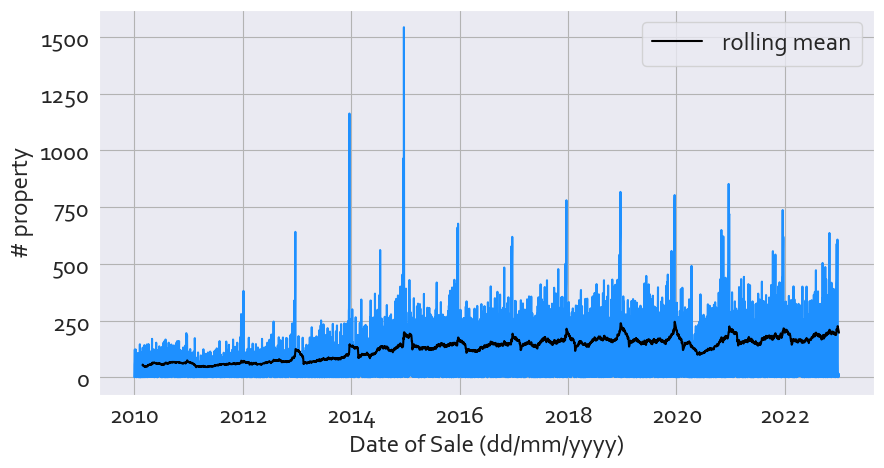

In [35]:
rolling_window= 5
sns.lineplot(x=Total.index, y=Total['# property'], color='dodgerblue')
sns.lineplot(x=Total.index, y=Total['# property'].rolling(52).mean(),  color='black', label='rolling mean')

In [36]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Total['# property'].values)
print(result)


(-4.929160459066553, 3.0591830326641223e-05, 32, 4461, {'1%': -3.4318167264794774, '5%': -2.862188117266657, '10%': -2.567114996565668}, 54394.873465119425)


H0 : time serie is non stationary

H1 : time serie is stationary

p = 0.05

In the results, we can see that the p-value obtained from the test is less than 0.05 so we are going to reject the null hypothesis “Time series is stationary”, that means the time series is non-stationary.

Since data needs to be stationary: log transformation

## Feature engineering ?

In [37]:
def create_features(x):
    x['year'] = pd.DatetimeIndex(x.index).year
    x['month'] = pd.DatetimeIndex(x.index).month
    x['day'] = pd.DatetimeIndex(x.index).day
    x['day_of_year'] = pd.DatetimeIndex(x.index).dayofyear
    x['week_of_year'] = pd.DatetimeIndex(x.index).weekofyear
    x['quarter'] = pd.DatetimeIndex(x.index).quarter
    return x

Total = create_features(Total)
Total.head(1)

C:\Users\santi\AppData\Local\Temp\ipykernel_31992\3387765079.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  x['week_of_year'] = pd.DatetimeIndex(x.index).weekofyear


,# property,year,month,day,day_of_year,week_of_year,quarter
Date of Sale (dd/mm/yyyy),,,,,,,
2010-01-01,1,2010,1,1,1,53,1


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomp = seasonal_decompose(Total['# property'], period=52, model='additive', extrapolate_trend='freq')
Total["property trend"] = decomp.trend
Total["property seasonal"] = decomp.seasonal

In [39]:
Total.head()

,# property,year,month,day,day_of_year,week_of_year,quarter,property trend,property seasonal
Date of Sale (dd/mm/yyyy),,,,,,,,,
2010-01-01,1,2010,1,1,1,53,1,44.787746,6.783637
2010-01-02,57,2010,1,2,2,53,1,44.944335,-14.650660
2010-01-03,70,2010,1,3,3,53,1,45.100924,-8.515771
2010-01-04,123,2010,1,4,4,1,1,45.257513,-4.680506
2010-01-05,2,2010,1,5,5,1,1,45.414101,17.603256


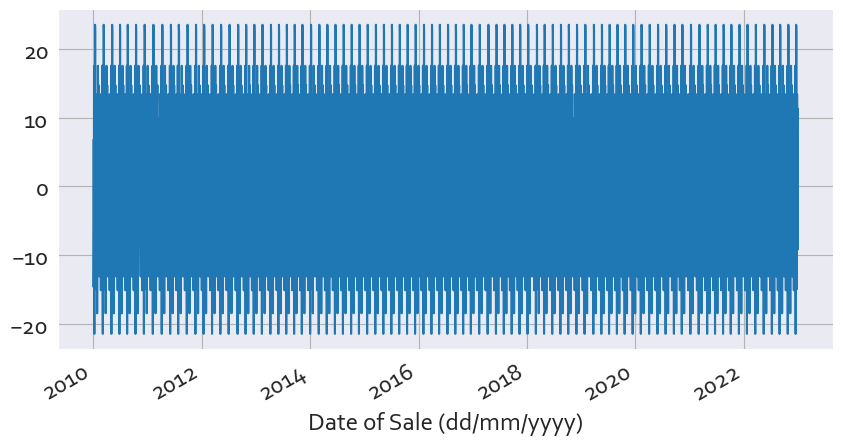

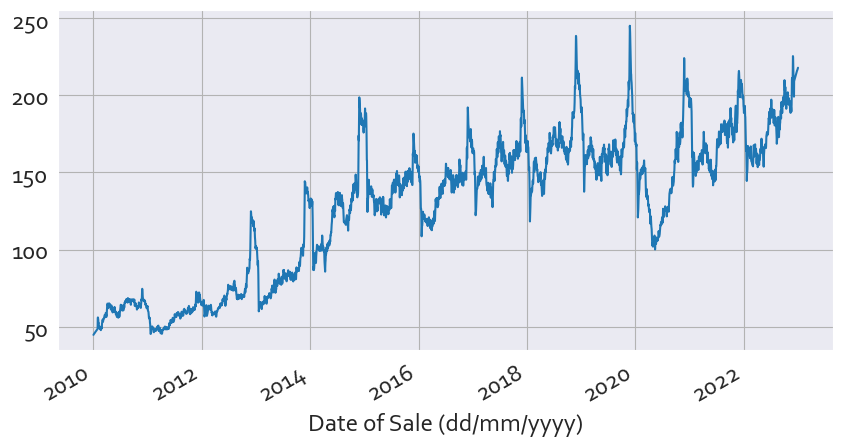

In [40]:
Total['property seasonal'].plot()
plt.show()
Total['property trend'].plot()
plt.show()


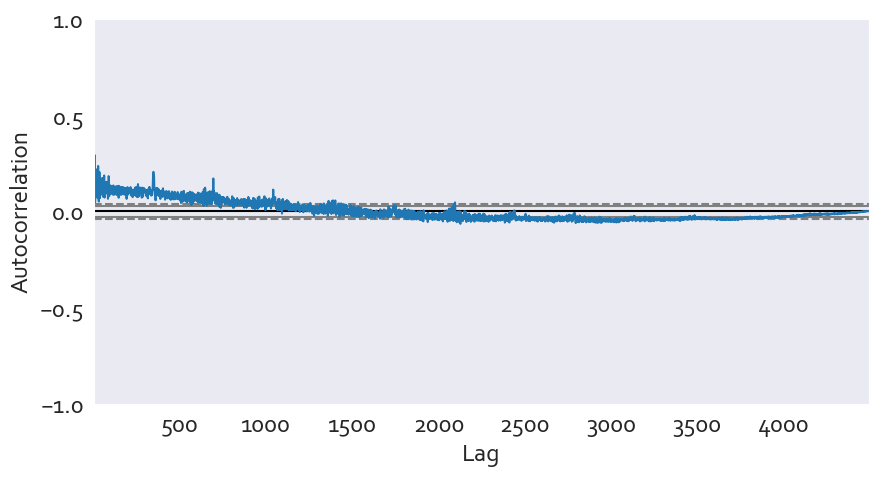

In [41]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Total['# property'])
plt.show()

c:\Users\santi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


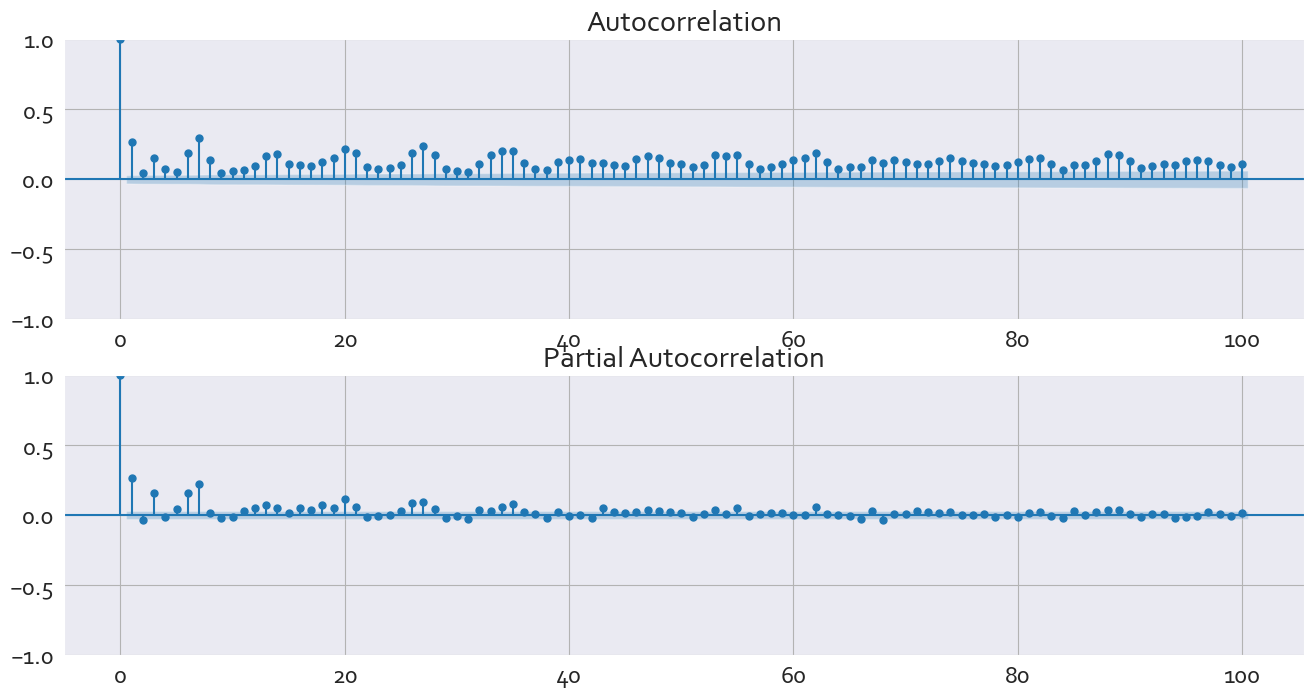

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(Total['# property'], lags=100, ax=ax[0])
plot_pacf(Total['# property'], lags=100, ax=ax[1])
plt.show()

In [43]:
size = round(len(Total) * 0.3 )                 #test size 30%

train = Total.iloc[:-size]
test = Total.iloc[-size:]
print(train.shape,test.shape)

(3146, 9) (1348, 9)


In [44]:
df = Total[['# property','year','month','day','day_of_year','week_of_year','quarter']]
train = df.iloc[:-size]
test = df.iloc[-size:]

X_train = train[['year','month','day','day_of_year','week_of_year','quarter']]
y_train = train['# property']

X_test = test[['year','month','day','day_of_year','week_of_year','quarter']]
y_test = test['# property']

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import time


reg = xgb.XGBRegressor(  n_estimators=1000,
                       early_stopping_rounds=50,)

from sklearn.model_selection import GridSearchCV


PARAMETERS = {"base_score":[0.5,0.4],
              "booster":['gbtree'],
              "objective":['reg:squarederror','reg:absoluteerror'],
              "subsample":[0.75, 1],
              "colsample_bytree":[0.75, 1],
              "max_depth":[2,3],
              "min_child_weight":[1,5],
              "learning_rate":[0.1,0.05]}

# create a validation set which will be used for early stopping
eval_set = [(X_test, y_test)]

# initialise an XGBoost classifier, set the number of estimators,
# evaluation metric & early stopping rounds

# initialise GridSearchCV model by passing the XGB classifier we
# initialised in the last step along with the dictionary of parameters
# and values to try. We also set the number of folds to validate over
# along with the scoring metic to use
model = GridSearchCV(estimator=reg ,
                    param_grid=PARAMETERS,
                    cv=3)

# fit model
model.fit(X_train,
          y_train,
          verbose=0,
          eval_set=eval_set)

# print out the best hyperparameters
print(model.best_params_)

reg.set_params(**model.best_params_)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

{'base_score': 0.4, 'booster': 'gbtree', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'objective': 'reg:squarederror', 'subsample': 0.75}
[0]	validation_0-rmse:148.39626	validation_1-rmse:199.41597
[100]	validation_0-rmse:87.96461	validation_1-rmse:124.06399
[114]	validation_0-rmse:87.57783	validation_1-rmse:124.08648


XGBRegressor(base_score=0.4, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

C:\Users\santi\AppData\Local\Temp\ipykernel_31992\2879762829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


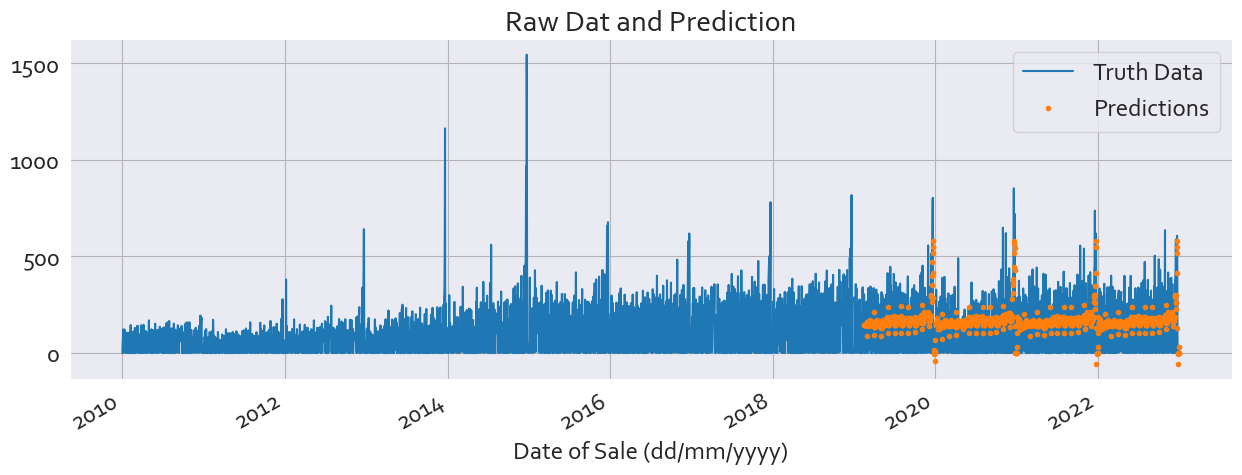

In [46]:
test['prediction'] = reg.predict(X_test)

df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['# property']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [47]:
# Create future dataframe
future_df=pd.DataFrame()
future = pd.date_range('2023-01-01','2024-12-31')
future = pd.DataFrame(future, index=future)
future = create_features(future)
future = future[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter']]
future.head()


C:\Users\santi\AppData\Local\Temp\ipykernel_31992\3387765079.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  x['week_of_year'] = pd.DatetimeIndex(x.index).weekofyear


,year,month,day,day_of_year,week_of_year,quarter
2023-01-01,2023,1,1,1,52,1
2023-01-02,2023,1,2,2,1,1
2023-01-03,2023,1,3,3,1,1
2023-01-04,2023,1,4,4,1,1
2023-01-05,2023,1,5,5,1,1


In [48]:
future['# property'] = reg.predict(future)

In [49]:
future['Prediction'] = 'prediction'
future.head()

,year,month,day,day_of_year,week_of_year,quarter,# property,Prediction
2023-01-01,2023,1,1,1,52,1,105.731239,prediction
2023-01-02,2023,1,2,2,1,1,149.452438,prediction
2023-01-03,2023,1,3,3,1,1,149.452438,prediction
2023-01-04,2023,1,4,4,1,1,152.434540,prediction
2023-01-05,2023,1,5,5,1,1,157.552200,prediction


In [50]:
import scipy.stats as st
inter = future['# property'].values

st.t.interval(alpha=0.95, df=len(inter)-1, loc=np.mean(inter), scale=st.sem(inter)) 

C:\Users\santi\AppData\Local\Temp\ipykernel_31992\2529536187.py:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(inter)-1, loc=np.mean(inter), scale=st.sem(inter))


(160.51853613984355, 168.45704979765645)

In [51]:
df = Total[['# property','year','month','day','day_of_year','week_of_year','quarter']]
df['Prediction']='raw data'
df.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_31992\2839603942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']='raw data'


,# property,year,month,day,day_of_year,week_of_year,quarter,Prediction
Date of Sale (dd/mm/yyyy),,,,,,,,
2010-01-01,1,2010,1,1,1,53,1,raw data
2010-01-02,57,2010,1,2,2,53,1,raw data
2010-01-03,70,2010,1,3,3,53,1,raw data
2010-01-04,123,2010,1,4,4,1,1,raw data
2010-01-05,2,2010,1,5,5,1,1,raw data


In [52]:
final = pd.concat([df,future])
final.head()

,# property,year,month,day,day_of_year,week_of_year,quarter,Prediction
2010-01-01,1.0,2010,1,1,1,53,1,raw data
2010-01-02,57.0,2010,1,2,2,53,1,raw data
2010-01-03,70.0,2010,1,3,3,53,1,raw data
2010-01-04,123.0,2010,1,4,4,1,1,raw data
2010-01-05,2.0,2010,1,5,5,1,1,raw data


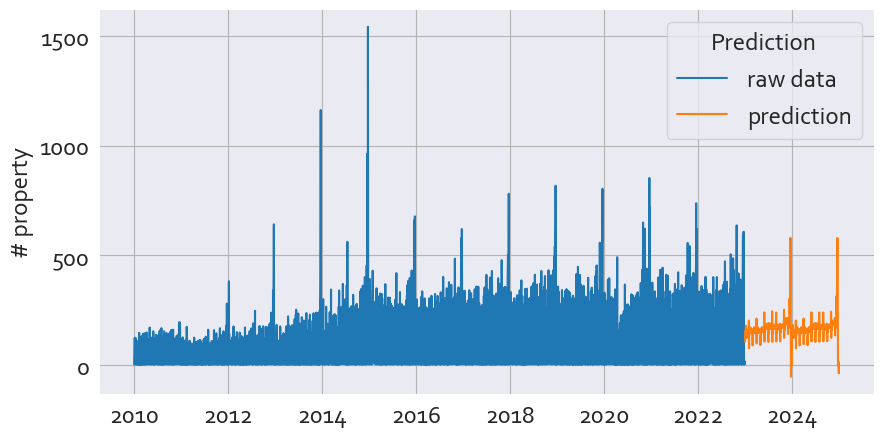

In [53]:
graph = sns.lineplot(data=final, x=final.index, y='# property', hue='Prediction')

Creating a function for creating model with specific county

In [54]:
def create_df_prediction(county):
    
    global Total
    Total = Data_vertical
    Total = Total[Total['county'] == county]
    _date = '2023-01-01'
    Total = Total[Total.index < _date]
    Total = Total[['# property']]
    Total['# property'] = Total['# property'].astype(np.int64)

    result = adfuller(Total['# property'].values)

    if result[1] < 0.05:
        print('ADF H1')

        Total = create_features(Total)

        size = round(len(Total) * 0.3)

        train = Total.iloc[:-size]
        test = Total.iloc[-size:]

        df = Total[['# property', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter']]
        train = df.iloc[:-size]
        test = df.iloc[-size:]

        X_train = train[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter']]
        y_train = train['# property']

        X_test = test[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter']]
        y_test = test['# property']

        reg_ = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
        PARAMS = {
            "base_score": [0.5, 0.4],
            "booster": ['gbtree'],
            "objective": ['reg:squarederror', 'reg:absoluteerror'],
            "subsample": [0.75, 1],
            "colsample_bytree": [0.75, 1],
            "max_depth": [2, 3],
            "min_child_weight": [1, 5],
            "learning_rate": [0.1, 0.05]
        }

        eval_set = [(X_test, y_test)]

        model = GridSearchCV(estimator=reg_,
                             param_grid=PARAMS,
                             cv=3)

        model.fit(X_train,
                  y_train,
                  verbose=0,
                  eval_set=eval_set)

        print(model.best_params_)

        reg_.set_params(**model.best_params_)

        reg_.fit(X_train, y_train,
                 eval_set=[(X_train, y_train), (X_test, y_test)],
                 verbose=100)

        future_df = pd.DataFrame()
        future = pd.date_range('2023-01-01', '2024-12-31')
        future = pd.DataFrame(future, index=future)
        future = create_features(future)
        future = future[['year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter']]

        future['# property'] = reg_.predict(future)
        future['Prediction'] = 'prediction'

        df = Total[['# property', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter']]
        df['Prediction'] = 'raw data'
        final = pd.concat([df, future])
        final['county'] = county
        return final

    else:
        print('ADF H0, not proceeding with XGB')
        return None


In [55]:
Dublin = create_df_prediction('Dublin')

ADF H1


C:\Users\santi\AppData\Local\Temp\ipykernel_31992\3387765079.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  x['week_of_year'] = pd.DatetimeIndex(x.index).weekofyear


KeyboardInterrupt: 

In [ ]:
Dublin.head()

,# property,year,month,day,day_of_year,week_of_year,quarter,Prediction
2010-01-01,1.0,2010,1,1,1,53,1,raw data
2010-01-02,21.0,2010,1,2,2,53,1,raw data
2010-01-03,24.0,2010,1,3,3,53,1,raw data
2010-01-04,47.0,2010,1,4,4,1,1,raw data
2010-01-05,0.0,2010,1,5,5,1,1,raw data


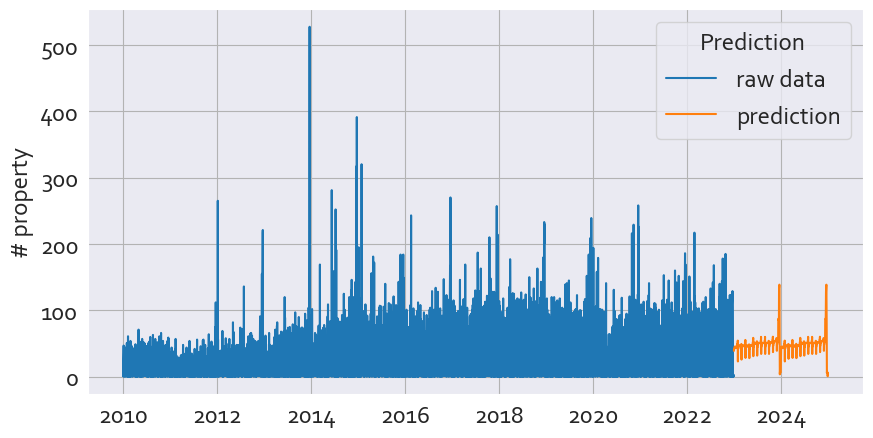

In [ ]:
graph = sns.lineplot(data=Dublin, x=final.index, y='# property', hue='Prediction')

In [ ]:
Data_vertical['county'].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wexford', 'Wicklow', 'total'], dtype=object)

In [56]:
Cork = create_df_prediction('Cork')
#Galway = create_df_prediction('Galway')
#Limerick = create_df_prediction('Limerick')
#Wicklow = create_df_prediction('Wicklow')

ADF H1


C:\Users\santi\AppData\Local\Temp\ipykernel_31992\3387765079.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  x['week_of_year'] = pd.DatetimeIndex(x.index).weekofyear


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'objective': 'reg:absoluteerror', 'subsample': 1}
[0]	validation_0-mae:11.98325	validation_1-mae:17.80285
[100]	validation_0-mae:9.88789	validation_1-mae:15.65387
[200]	validation_0-mae:8.75148	validation_1-mae:13.87965
[300]	validation_0-mae:8.09841	validation_1-mae:12.55367
[400]	validation_0-mae:7.79637	validation_1-mae:11.81983
[500]	validation_0-mae:7.65815	validation_1-mae:11.50646
[600]	validation_0-mae:7.57004	validation_1-mae:11.35950
[700]	validation_0-mae:7.51042	validation_1-mae:11.28184
[800]	validation_0-mae:7.46404	validation_1-mae:11.21093
[900]	validation_0-mae:7.42506	validation_1-mae:11.16387
[999]	validation_0-mae:7.38484	validation_1-mae:11.11272


C:\Users\santi\AppData\Local\Temp\ipykernel_31992\3387765079.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  x['week_of_year'] = pd.DatetimeIndex(x.index).weekofyear


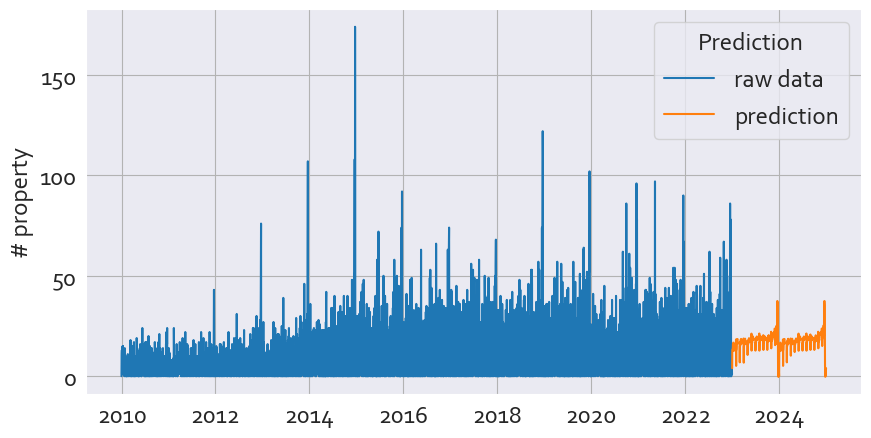

In [58]:
graph = sns.lineplot(data=Cork, x=final.index, y='# property', hue='Prediction')

In [69]:
from dash import Dash, html, dcc, callback, Output, Input, dcc
import plotly.express as px
import pandas as pd
from datetime import date


df = Cork

app = Dash(__name__)

app.layout = html.Div([
     dcc.DatePickerRange(
        id='my-date-picker-range',
        min_date_allowed=date(2010, 1, 1),
        max_date_allowed=date(2024, 12, 31),
        initial_visible_month=date(2020, 1, 1),
        end_date=date(2024, 1, 1)
    ),
    html.H1(children='Predicting number of properties saled', style={'textAlign':'center'}),
    dcc.Dropdown(df.county.unique(), 'Cork', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value'),
    Input('my-date-picker-range', 'start_date'),
    Input('my-date-picker-range', 'end_date'))

def update_output(value,start_date, end_date):
    string_prefix = 'You have selected: '
    if start_date is not None:
        start_date_object = date.fromisoformat(start_date)
        start_date_string = start_date_object.strftime('%B %d, %Y')
        string_prefix = string_prefix + 'Start Date: ' + start_date_string + ' | '
    if end_date is not None:
        end_date_object = date.fromisoformat(end_date)
        end_date_string = end_date_object.strftime('%B %d, %Y')
        string_prefix = string_prefix + 'End Date: ' + end_date_string
    if len(string_prefix) == len('You have selected: '):
        return 'Select a date to see it displayed here'
    else:
        dff = df[df['county'] == value]
        fig = px.line(dff, x='date', y='# property')
    return fig

def update_graph(value):
    dff = df[df.county==value]
    df['date'] = df.index
    return px.line(df, x='date', y='# property')

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off
